<a href="https://colab.research.google.com/github/AlketaAlia123/Computer_Vision_Exercises/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MODULE 3: IMAGE CLASSIFICATION

Christian Mata, PhD


# **EXERCISE 4**

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Generate synthetic image with random blobs

1. Generating synthetic image with random blobs...


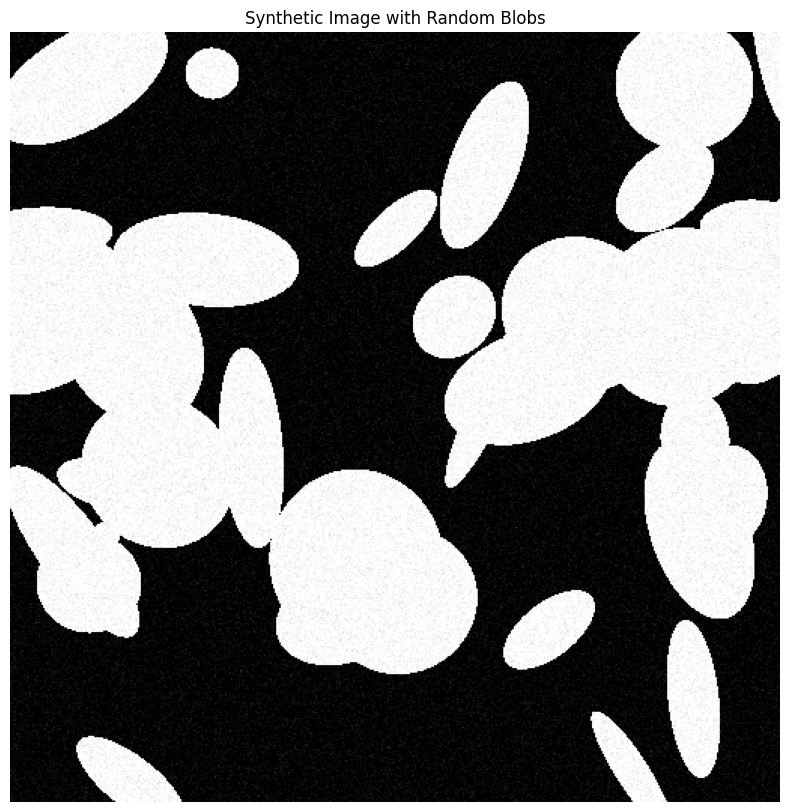

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, measure, io, feature, exposure
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import clear_border
from skimage.color import label2rgb
from skimage.draw import ellipse
from skimage.feature.texture import graycomatrix, graycoprops
import pandas as pd
from scipy import ndimage as ndi

# 1. Generate synthetic image with random blobs
print("1. Generating synthetic image with random blobs...")
np.random.seed(42)  # For reproducibility

# Create a blank image
image_size = 512
image = np.zeros((image_size, image_size), dtype=np.float64)

# Generate random blobs with different sizes and shapes
num_blobs = 35
for _ in range(num_blobs):
    # Random position
    x = np.random.randint(0, image_size)
    y = np.random.randint(0, image_size)

    # Random size
    width = np.random.randint(10, 70)
    height = np.random.randint(10, 70)

    # Random orientation
    orientation = np.random.uniform(0, np.pi)

    # Create an ellipse
    rr, cc = ellipse(x, y, width, height, image.shape, rotation=orientation)

    # Make sure indices are within bounds
    valid_indices = (
        (rr >= 0) & (rr < image.shape[0]) &
        (cc >= 0) & (cc < image.shape[1])
    )
    rr, cc = rr[valid_indices], cc[valid_indices]

    # Add the blob to the image
    image[rr, cc] = 1

# Add some noise
noise = np.random.normal(0, 0.05, image.shape)
image = image + noise
image = np.clip(image, 0, 1)

# Display the generated image
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.title('Synthetic Image with Random Blobs')
plt.axis('off')
plt.show()

# 2. Object segmentation and labeling

- Segmentation of blobs using Otsu's optimal threshold
- Labeling connected regions
- Visualization



2. Object segmentation and labeling...


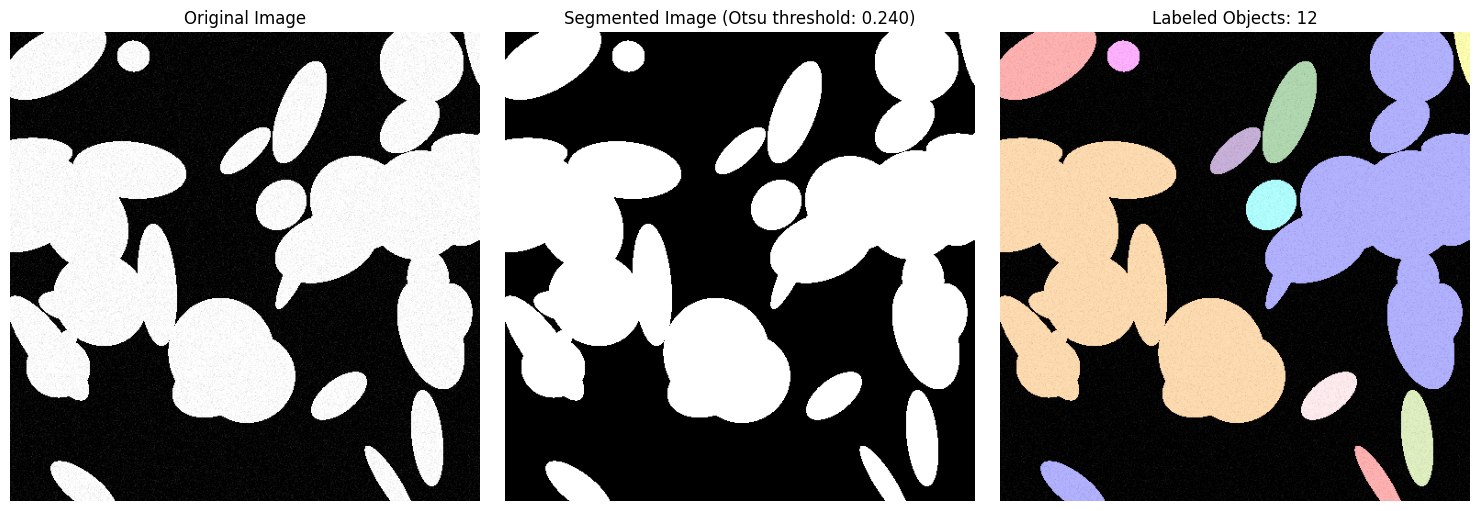

In [ ]:
# 2. Object segmentation and labeling
print("2. Object segmentation and labeling...")

# Segmentation of blobs using Otsu's optimal threshold
thresh = threshold_otsu(image)
binary = image > thresh

# Labeling connected regions
label_image = label(binary)
num_labels = np.max(label_image)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Binary image
axes[1].imshow(binary, cmap='gray')
axes[1].set_title(f'Segmented Image (Otsu threshold: {thresh:.3f})')
axes[1].axis('off')

# Labeled image with colormap
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)
axes[2].imshow(image_label_overlay)
axes[2].set_title(f'Labeled Objects: {num_labels}')
axes[2].axis('off')

plt.tight_layout()
plt.show()


# 3. Get regional properties in a pandas dataframe

Function documentation with a list of available attributes can be found at https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops_table


In [ ]:
# 3. Get regional properties in a pandas dataframe
print("3. Getting regional properties in a pandas dataframe...")
properties = ['label', 'area', 'perimeter', 'eccentricity',
              'major_axis_length', 'minor_axis_length', 'orientation']
# Compute all the properties and store them in a DataFrame
props = regionprops_table(label_image, image, properties=properties)
df = pd.DataFrame(props)

# Display the first 5 rows of the dataframe
print("First 5 rows of the regional properties dataframe:")
print(df.head())

3. Getting regional properties in a pandas dataframe...
First 5 rows of the regional properties dataframe:
   label     area    perimeter  eccentricity  major_axis_length  \
0      1   5734.0   306.208153      0.843530         117.517188   
1      2  41454.0  1532.923015      0.813363         370.196938   
2      3    665.0   137.834524      0.963770          59.693408   
3      4    953.0   112.568542      0.315052          35.757751   
4      5   4253.0   282.107648      0.921237         117.984738   

   minor_axis_length  orientation  
0          63.116416    -1.090747  
1         215.364241    -0.068902  
2          15.922279     0.135060  
3          33.936770     1.469297  
4          45.896297    -0.358444  


Represent area of the blobs as a function of the major axis length

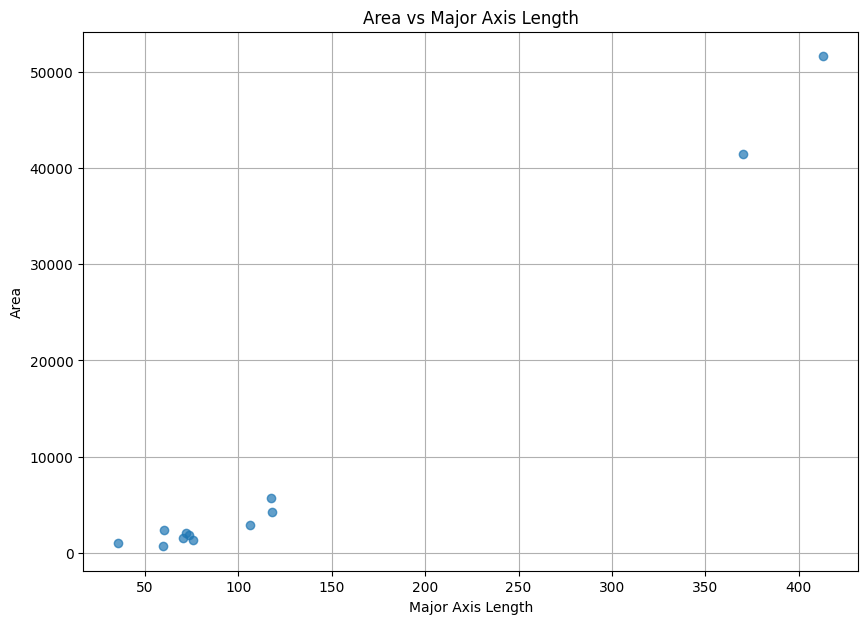

Clear correlation between blob's length and area can be observed


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['major_axis_length'], df['area'], alpha=0.7)
plt.xlabel('Major Axis Length')
plt.ylabel('Area')
plt.title('Area vs Major Axis Length')
plt.grid(True)
plt.show()

print("Clear correlation between blob's length and area can be observed")


Clear correlation between blob's length and area can be observed

#4. Analyze blobs


Since you have the feature data in a pandas dataframe, you can exploit all the functions of te libraries. For instance:

How many blobs have an area above the average?

In [ ]:
# 4. Analyze blobs
print("4. Analyzing blobs...")

# How many blobs have an area above the average?
avg_area = df['area'].mean()
large_blobs = df[df['area'] > avg_area]
print(f"Average blob area: {avg_area:.2f}")
print(f"Number of blobs with area above average: {len(large_blobs)}")



4. Analyzing blobs...
Average blob area: 9717.58
Number of blobs with area above average: 2


In [ ]:
# Represent the blobs that have an area smaller than the average blob's area
# Find the labels of small and large blobs
small_blob_labels = df[df['area'] <= avg_area]['label'].values
large_blob_labels = df[df['area'] > avg_area]['label'].values

print(f"Labels of small blobs: {small_blob_labels}")
print(f"Labels of large blobs: {large_blob_labels}")



Labels of small blobs: [ 1  3  4  5  6  8  9 10 11 12]
Labels of large blobs: [2 7]


Represent the blobs that have an area smaller than the average blob's area

Average blob area: 9717.58
Number of blobs with area smaller than or equal to average: 10


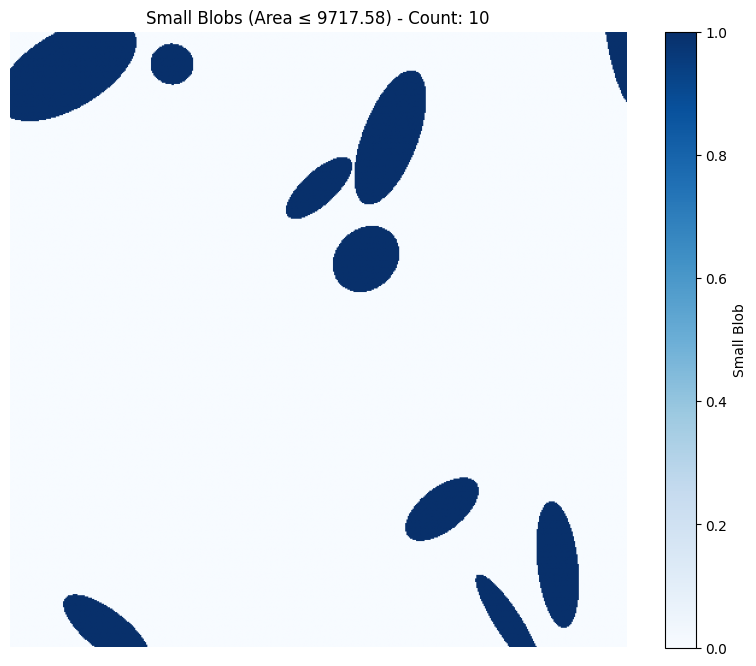

In [ ]:
# Represent the blobs that have an area smaller than the average blob's area
avg_area = df['area'].mean()
small_blobs = df[df['area'] <= avg_area]
num_small_blobs = len(small_blobs)

print(f"Average blob area: {avg_area:.2f}")
print(f"Number of blobs with area smaller than or equal to average: {num_small_blobs}")

# Create a mask for small blobs
small_blobs_mask = np.zeros_like(label_image, dtype=bool)
for label_val in small_blobs['label'].values:
    small_blobs_mask = np.logical_or(small_blobs_mask, label_image == label_val)

# Display the small blobs
plt.figure(figsize=(10, 8))
plt.imshow(small_blobs_mask, cmap='Blues')
plt.title(f'Small Blobs (Area ≤ {avg_area:.2f}) - Count: {num_small_blobs}')
plt.axis('off')
plt.colorbar(label='Small Blob')
plt.show()

find the labels of small and large blobs

In [ ]:
# Find the labels of small and large blobs
small_blob_labels = df[df['area'] <= avg_area]['label'].values
large_blob_labels = df[df['area'] > avg_area]['label'].values

print(f"Labels of small blobs: {small_blob_labels}")
print(f"Labels of large blobs: {large_blob_labels}")

Labels of small blobs: [ 1  3  4  5  6  8  9 10 11 12]
Labels of large blobs: [2 7]


Create a binary mask with the large and small blobs

In [ ]:

small_blobs_mask = np.isin(label_image, small_blob_labels)
large_blobs_mask = np.isin(label_image, large_blob_labels)

Represent the large and small blobs

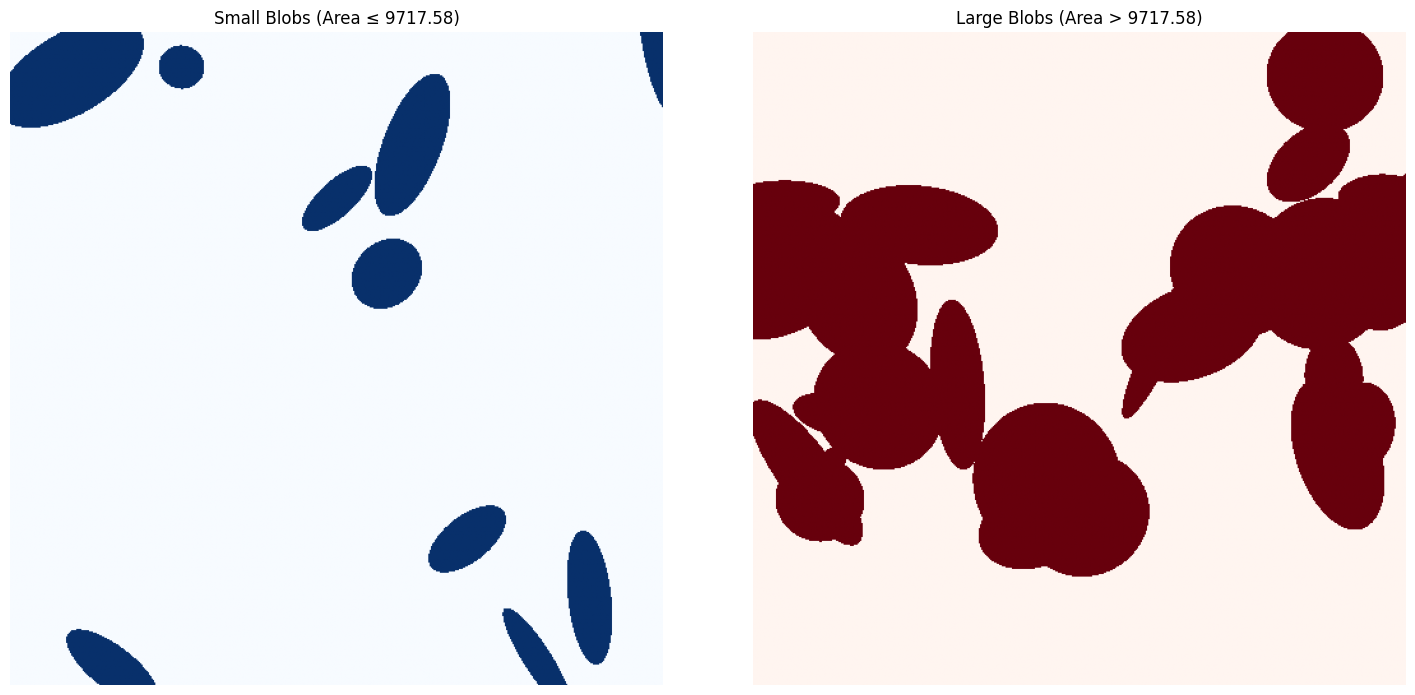

In [ ]:
# Visualize the small and large blobs
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Small blobs
axes[0].imshow(small_blobs_mask, cmap='Blues')
axes[0].set_title(f'Small Blobs (Area ≤ {avg_area:.2f})')
axes[0].axis('off')

# Large blobs
axes[1].imshow(large_blobs_mask, cmap='Reds')
axes[1].set_title(f'Large Blobs (Area > {avg_area:.2f})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

#5. Obtain texture-based regional properties

For the original image

In [ ]:
# 5. Obtain texture-based regional properties
print("5. Obtaining texture-based regional properties...")

example_image = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 2, 2, 2],
    [2, 2, 3, 3]
], dtype=np.uint8)

print("Example image for GLCM analysis:")
print(example_image)

# Compute the Gray Level Co-occurrence Matrix (GLCM)
glcm = graycomatrix(example_image, [1], [0], levels=4, normed=False, symmetric=False)

# Print the GLCM values as in the expected output
print(f"Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): {glcm[0,0,0,0]}")
print(f"Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): {glcm[0,1,0,0]}")
print(f"Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): {glcm[2,2,0,0]}")
print(f"Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): {glcm[2,0,0,0]}")

5. Obtaining texture-based regional properties...
Example image for GLCM analysis:
[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): 2
Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 2
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 3
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 0


Texture properties for the entire original image:
Contrast: 814.240999
Dissimilarity: 9.940202
Homogeneity: 0.324960
Energy: 0.196896
Correlation: 0.972603

Calculating GLCM properties for each blob in the original image...

Texture properties for each blob:
0	884.67705128	8.54858974	0.49596114	0.32599029	0.96395927
1	671.11116886	5.97688843	0.66408800	0.53150679	0.97846614
2	3606.23330010	18.34496510	0.55053142	0.38252806	0.87596733
3	2599.88907563	15.62689076	0.44458608	0.28851507	0.87427216
4	1816.24184529	11.87496117	0.51868630	0.36574236	0.93547198
5	2047.22839506	11.91176471	0.60216378	0.45298764	0.93371960
6	701.42411576	6.46131107	0.62608908	0.48034226	0.97743447
7	1893.82053872	12.95521886	0.42985508	0.27596316	0.90871424
8	1877.74182390	11.79465409	0.54809302	0.38697732	0.93500233
9	2707.78879552	16.16974790	0.43275866	0.28109226	0.87299445
10	2441.46300000	12.77500000	0.67553245	0.55545422	0.92045078
11	1730.29611331	11.08135705	0.56419405	0.41465997	0.94227439


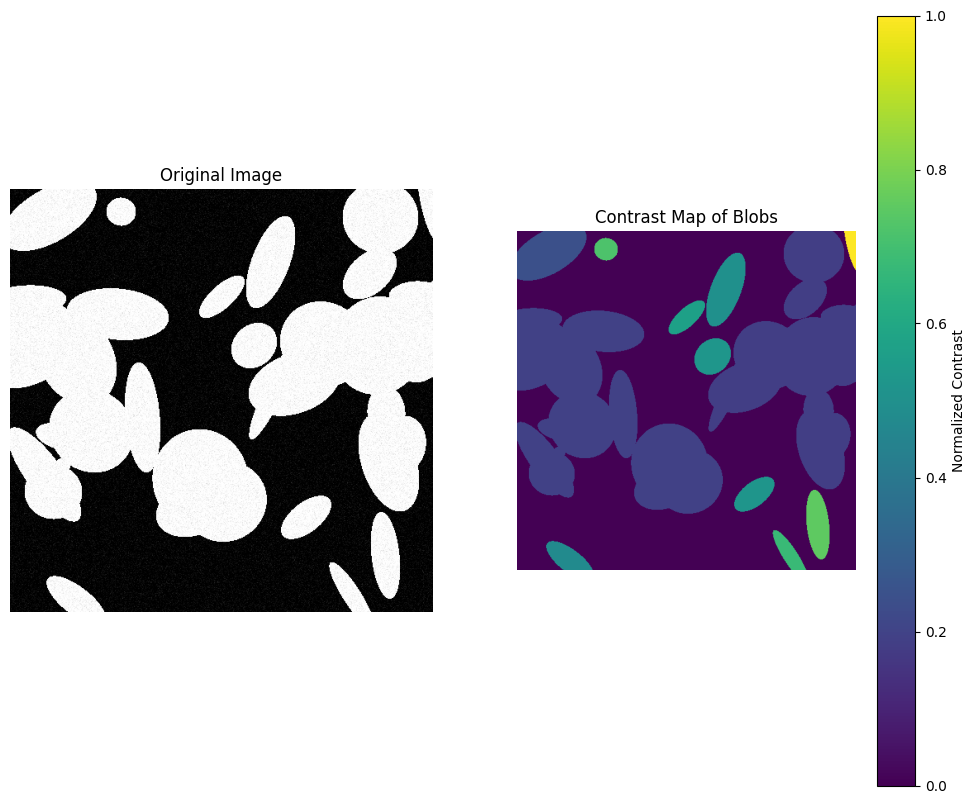

In [ ]:
# Convert original image to uint8 for GLCM
image_uint8 = (image * 255).astype(np.uint8)

# Calculate the GLCM for the original image
original_glcm = graycomatrix(image_uint8, [1], [0], levels=256, normed=True, symmetric=True)

# Calculate texture properties
contrast = graycoprops(original_glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(original_glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(original_glcm, 'homogeneity')[0, 0]
energy = graycoprops(original_glcm, 'energy')[0, 0]
correlation = graycoprops(original_glcm, 'correlation')[0, 0]

print(f"Texture properties for the entire original image:")
print(f"Contrast: {contrast:.6f}")
print(f"Dissimilarity: {dissimilarity:.6f}")
print(f"Homogeneity: {homogeneity:.6f}")
print(f"Energy: {energy:.6f}")
print(f"Correlation: {correlation:.6f}")

# Calculate texture properties for each labeled region
# Create a DataFrame to store the texture properties for each blob
print("\nCalculating GLCM properties for each blob in the original image...")

texture_props = []

for i, region in enumerate(regionprops(label_image, intensity_image=image)):
    # Get the region image
    minr, minc, maxr, maxc = region.bbox
    roi = image[minr:maxr, minc:maxc]

    # Create a mask for the current region
    mask = label_image[minr:maxr, minc:maxc] == region.label

    # Apply mask to get only pixels in the blob
    roi_masked = roi.copy()
    roi_masked[~mask] = 0

    # Convert to uint8 for GLCM
    roi_uint8 = (roi_masked * 255).astype(np.uint8)

    # Compute GLCM for this region
    if np.max(roi_uint8) > 0:  # Check if there are non-zero pixels
        glcm = graycomatrix(roi_uint8, [1], [0], levels=256, normed=True, symmetric=True)

        # Compute texture properties
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
    else:
        # Default values if region is empty
        contrast = 0
        dissimilarity = 0
        homogeneity = 0
        energy = 0
        correlation = 0

    # Append to our list of texture properties
    texture_props.append({
        'label': region.label,
        'Contrast': contrast,
        'Dissimilarity': dissimilarity,
        'Homogeneity': homogeneity,
        'Energy': energy,
        'Correlation': correlation
    })

# Convert to DataFrame
texture_df = pd.DataFrame(texture_props)

# Display texture properties in the format expected in your output
print("\nTexture properties for each blob:")
for index, row in texture_df.iterrows():
    print(f"{index}\t{row['Contrast']:.8f}\t{row['Dissimilarity']:.8f}\t{row['Homogeneity']:.8f}\t{row['Energy']:.8f}\t{row['Correlation']:.8f}")

# Visualize one of the texture properties (e.g., contrast) on the original image
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Create a map of texture property values
contrast_map = np.zeros_like(image)
for row in texture_props:
    label_val = row['label']
    contrast_val = row['Contrast'] / texture_df['Contrast'].max() if texture_df['Contrast'].max() > 0 else 0
    contrast_map[label_image == label_val] = contrast_val

plt.subplot(1, 2, 2)
plt.imshow(contrast_map, cmap='viridis')
plt.title('Contrast Map of Blobs')
plt.colorbar(label='Normalized Contrast')
plt.axis('off')
plt.show()